Mahdi Ahmadi
Blatt_1 Data Science
teil 1 
Schritt 1_2


In [2]:
import requests
import bs4
import pandas as pd
import numpy as np
from datetime import datetime




url = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url,headers=headers)
print(response)
if response.status_code == 200:
    page_content = response.text
    soup = bs4.BeautifulSoup(page_content, 'html.parser')# html inhlat paresen

    table = soup.find('table', {'class': 'table table-striped'})# tabllen als Variable speichern
    if table:
        df = pd.read_html(str(table))[0]#html datei einlesen
        df.columns = ['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 'end_time', 'film'] # spalten benennen     
        df = df.drop(columns = ['film'])
        #kombi datum und zeit in 3 datetime spalten 
        for index, row in df.iterrows():
            date_str = row ['date']
            start_time_str = row ['start_time']
            max_time_str = row ['max_time']
            end_time_str = row ['end_time']

            #kombinieren Datum und  Zeit
            start_datetime = datetime.strptime(f"{date_str} {start_time_str}", "%Y/%m/%d %H:%M") 
            max_datetime = datetime.strptime(f"{date_str} {max_time_str}", "%Y/%m/%d %H:%M")
            end_datetime = datetime.strptime(f"{date_str} {end_time_str}", "%Y/%m/%d %H:%M")

            #aktualisieren der Daten
            df.at[index, 'start_datetime'] = start_datetime
            df.at[index, 'max_datetime'] = max_datetime
            df.at[index, 'end_datetime'] = end_datetime
            
            # Lösche die alten Spalten
        df_weather = df.drop(columns = ['date', 'start_time', 'max_time', 'end_time'])

        #Regionen mit - = NaN
        df_weather['region'] = df_weather['region'].replace('-', np.nan)
        #Deimension des DataFrames
        print(f"Dimension: {df_weather.shape[0]} × {df_weather.shape[1]}")

        print(df_weather.head(50))
    else:
        print ("Tablle nicht gefunden")
else :
    print ("Seite nicht gefunden")
 





<Response [200]>
Dimension: 50 × 6
    rank  x_class  region      start_datetime        max_datetime  \
0      1     X40+     486 2003-11-04 19:29:00 2003-11-04 19:53:00   
1      2  X28.57+    9393 2001-04-02 21:32:00 2001-04-02 21:51:00   
2      3  X24.57+     486 2003-10-28 09:51:00 2003-10-28 11:10:00   
3      4  X24.42+     808 2005-09-07 17:17:00 2005-09-07 17:40:00   
4      5  X20.67+    9415 2001-04-15 13:19:00 2001-04-15 13:50:00   
5      6   X14.36     486 2003-10-29 20:37:00 2003-10-29 20:49:00   
6      7   X13.37    2673 2017-09-06 11:53:00 2017-09-06 12:02:00   
7      8   X12.97    8100 1997-11-06 11:49:00 1997-11-06 11:55:00   
8      9   X12.95     930 2006-12-05 10:18:00 2006-12-05 10:35:00   
9     10   X11.96     486 2003-11-02 17:03:00 2003-11-02 17:25:00   
10    11   X11.88    2673 2017-09-10 15:35:00 2017-09-10 16:06:00   
11    12   X10.18     720 2005-01-20 06:36:00 2005-01-20 07:01:00   
12    13    X9.96    1263 2011-08-09 07:48:00 2011-08-09 08:05:00   

C:\Users\mahdi\AppData\Local\Temp\ipykernel_16732\4122374591.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]#html datei einlesen


Teil 1 Schritt 3 

In [3]:

# URL der Webseite
url = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url, headers=headers)
print(response)

if response.status_code == 200:
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    
    # Extrahiere den Inhalt des <pre>-Tags
    pre_tag = soup.find('pre')#tabelle faegt mit per tag an
    
    if pre_tag:
        # Extrahiere den Text aus dem <pre>-Tag
        pre_text = pre_tag.text

        # Splitte den Text in Zeilen
        lines = pre_text.split('\n')
 
        # Initialisiere eine leere Liste, um die Daten zu speichern
        data = []
        
        # Überspringe die ersten Zeilen, die keine Daten enthalten
        for line in lines[5:]:
            if line.strip() == "=================================================================================================":
                continue #strip entfernt leerzeichen
            if line.strip() == "":
                continue

            # split String in einzelne Elemente,lerrzeichen als Trennzeichen
            columns = line.split()
            
            # len = Anzahl der Elemente
            if len(columns) == 15:
                data.append(columns)#append elemente hinzufuegen
        
        columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency',
                   'solar_source_location', 'noaa_active_region', 'soft_xray_flare_importance', 'cme_date',
                   'cme_time', 'central_position_angle', 'cme_width', 'cme_speed', 'phtx_link']
        
        # DataFrame data im Spalten zuordnen
        df = pd.DataFrame(data, columns=columns)
        
        # Zeige die Dimensionen des DataFrames an
        print(f"Dimension: {df.shape[0]} x {df.shape[1]}")#f string im {}zusammenfassen
        # shape = dimensionen als tuple [0] = zeilen [1] = spalten
        print(df)
    else:
        print("Pre-Tag nicht gefunden")
else:
    print("Fehler beim Request")

<Response [200]>
Dimension: 527 x 15
     start_date start_time end_date end_time start_frequency end_frequency  \
0           (1)        (2)      (3)      (4)             (5)           (6)   
1    1997/01/20      08:56    01/20    09:02           14000         12000   
2    1997/04/01      14:00    04/01    14:15            8000          4000   
3    1997/04/07      14:30    04/07    17:30           11000          1000   
4    1997/05/12      05:15    05/14    16:00           12000            80   
..          ...        ...      ...      ...             ...           ...   
522  2023/05/05      08:04    05/05    08:50           14000          1300   
523  2023/05/07      22:57    05/08    00:10           14000           600   
524  2023/05/09      18:51    05/09    20:20           16000          1250   
525  2023/06/17      10:37    06/17    10:42           14000          5500   
526  2023/06/20      17:54    06/20    18:30           14000          2000   

    solar_source_location 

Teil 1, Schritt 4
Daten bereinigen


In [4]:

        
#--/-- = Platzhalter für fehlende datum und --:-- = Platzhalter für fehlende Zeit
missing_values = ["--", "----", "Halo", "------", "-----", "----", "--/--", "--:--", "----", "----", "----"]
df.replace(missing_values, np.nan, inplace=True)# inplace = true ersetzt im orginal daten;false = erstellt eine kopie

#is_halo = neue Spalte; wenn central_position_angle = Halo dann True sonst False
df['is_halo'] = df['central_position_angle'].apply(lambda x: True if x == "Halo" else False)
df['central_position_angle'] = df['central_position_angle'].replace("Halo", np.nan)#ersetzt Halo durch NaN

#insistance(x = objrct , klasse)prüft ob x von klasse ist
df['width_lower_bound'] = df['cme_width'].apply(lambda x: True if isinstance(x, str) and ">" in x else False)
df['cme_width'] = df['cme_width'].apply(lambda x: x.replace(">", "") if isinstance(x, str) else x)#entfernen > von String


#to_datetime = konvert time,date in datetime
df['start_datetime'] = pd.to_datetime(df['start_date'] + ' ' + df['start_time'], errors='coerce')#'coerce'= ungültige Werte in NaN 
df['end_datetime'] = pd.to_datetime(df['start_date'] + ' ' + df['end_time'], errors='coerce')

#im df gabt keine jahr ,und error = coerce
df['cme_date'] = '1997/' + df['cme_date']  

df['cme_datetime'] = pd.to_datetime(df['cme_date'] + ' ' + df['cme_time'], errors='coerce')

#drop = löschen von spalten
df.drop(columns=['start_date', 'start_time', 'end_date', 'end_time', 'cme_date', 'cme_time'], inplace=True)

#spalten am anfang vorrücken, col for col in df: eine for schleife die alle spalten durchgeht if col not in filtert die spalten
cols = ['start_datetime', 'end_datetime', 'cme_datetime'] + [col for col in df if col not in ['start_datetime', 'end_datetime', 'cme_datetime']]
df = df[cols]
df_nasa = df

        # Ergebnis anzeigen
print(df_nasa)


         start_datetime        end_datetime        cme_datetime  \
0                   NaT                 NaT                 NaT   
1   1997-01-20 08:56:00 1997-01-20 09:02:00 1997-01-20 09:31:00   
2   1997-04-01 14:00:00 1997-04-01 14:15:00 1997-04-01 15:18:00   
3   1997-04-07 14:30:00 1997-04-07 17:30:00 1997-04-07 14:27:00   
4   1997-05-12 05:15:00 1997-05-12 16:00:00 1997-05-12 05:30:00   
..                  ...                 ...                 ...   
522 2023-05-05 08:04:00 2023-05-05 08:50:00 1997-05-05 08:00:00   
523 2023-05-07 22:57:00 2023-05-07 00:10:00 1997-05-07 23:12:00   
524 2023-05-09 18:51:00 2023-05-09 20:20:00 1997-05-09 19:00:00   
525 2023-06-17 10:37:00 2023-06-17 10:42:00 1997-06-17 10:48:00   
526 2023-06-20 17:54:00 2023-06-20 18:30:00 1997-06-20 17:12:00   

    start_frequency end_frequency solar_source_location noaa_active_region  \
0               (5)           (6)                   (7)                (8)   
1             14000         12000      

C:\Users\mahdi\AppData\Local\Temp\ipykernel_16732\3312001739.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_datetime'] = pd.to_datetime(df['start_date'] + ' ' + df['start_time'], errors='coerce')#'coerce'= ungültige Werte in NaN
C:\Users\mahdi\AppData\Local\Temp\ipykernel_16732\3312001739.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_datetime'] = pd.to_datetime(df['start_date'] + ' ' + df['end_time'], errors='coerce')
C:\Users\mahdi\AppData\Local\Temp\ipykernel_16732\3312001739.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['cme_datet

Teil 2 Frage 1

In [5]:
import pandas as pd

# Assuming df_nasa is already defined DataFrame

# Function to clean and convert soft_xray_flare_importance to numeric
def clean_xray_importance(value):
    if isinstance(value, str):
        # Remove 'X' prefix and any non-numeric characters
        value = value.strip('X').replace('(', '').replace(')', '')
    try:
        return float(value)
    except ValueError:
        return None

# Apply the cleaning function to the column
df_nasa['soft_xray_flare_importance_numeric'] = df_nasa['soft_xray_flare_importance'].apply(clean_xray_importance)

# Drop rows where conversion failed (optional)
df_nasa = df_nasa.dropna(subset=['soft_xray_flare_importance_numeric'])

# Sort df_nasa by the numeric column in descending order
df_nasa_sorted = df_nasa.sort_values(by='soft_xray_flare_importance_numeric', ascending=False)

# Select the top 50 solar events
df_top_50 = df_nasa_sorted.head(50)

# Display the top 50 solar events
print(df_top_50)

# Drop the numeric column if no longer needed
df_nasa_sorted = df_nasa_sorted.drop(columns=['soft_xray_flare_importance_numeric'])

# Continue with the rest of the code
df_spaceweather = df_weather

# Check if both DataFrames are not empty
if not df_spaceweather.empty and not df_nasa.empty:
    # Print columns of both DataFrames to debug
    print("Columns in df_spaceweather:", df_spaceweather.columns)
    print("Columns in df_nasa:", df_nasa.columns)
    
    # Define the columns to compare
    comparison_columns_nasa = ['start_datetime', 'soft_xray_flare_importance']
    comparison_columns_spaceweather = ['start_datetime', 'x_class']

    # Check if the required columns are present in both DataFrames
    missing_columns_spaceweather = [col for col in comparison_columns_spaceweather if col not in df_spaceweather.columns]
    missing_columns_nasa = [col for col in comparison_columns_nasa if col not in df_nasa.columns]

    if missing_columns_spaceweather or missing_columns_nasa:
        print(f"Missing columns in df_spaceweather: {missing_columns_spaceweather}")
        print(f"Missing columns in df_nasa: {missing_columns_nasa}")
    else:
        # Rename columns in df_spaceweather to match df_nasa for comparison
        df_spaceweather_renamed = df_spaceweather.rename(columns={'x_class': 'soft_xray_flare_importance'})

        # Perform a merge to find matches based on comparison criteria
        df_comparison = pd.merge(df_spaceweather_renamed[comparison_columns_nasa], df_nasa[comparison_columns_nasa], 
                                 on=comparison_columns_nasa, how='inner', suffixes=('_spaceweather', '_nasa'))

        # Display the matches
        print(f"Number of matches: {df_comparison.shape[0]}")
        print(df_comparison)

        # Save the matches to a file
        df_comparison.to_csv('vergleich_spaceweather_nasa.csv', index=False)
else:
    print("Error: One or both DataFrames are empty. Please check the data loading process.")

         start_datetime        end_datetime        cme_datetime  \
225 2003-11-04 20:00:00                 NaT 1997-11-04 19:54:00   
114 2001-04-02 22:05:00 2001-04-02 02:30:00 1997-04-02 22:06:00   
218 2003-10-28 11:10:00                 NaT 1997-10-28 11:30:00   
121 2001-04-15 14:05:00 2001-04-15 13:00:00 1997-04-15 14:06:00   
219 2003-10-29 20:55:00                 NaT 1997-10-29 20:54:00   
10  1997-11-06 12:20:00 1997-11-06 08:30:00 1997-11-06 12:10:00   
471 2017-09-06 12:05:00 2017-09-06 08:00:00 1997-09-06 12:24:00   
0                   NaT                 NaT                 NaT   
222 2003-11-02 17:30:00 2003-11-02 01:00:00 1997-11-02 17:30:00   
265 2005-01-20 07:15:00 2005-01-20 16:30:00 1997-01-20 06:54:00   
327 2011-08-09 08:20:00 2011-08-09 08:35:00 1997-08-09 08:12:00   
292 2005-09-09 19:45:00 2005-09-09 22:00:00 1997-09-09 19:48:00   
81  2000-07-14 10:30:00 2000-07-14 14:30:00 1997-07-14 10:54:00   
344 2012-03-07 01:00:00 2012-03-07 19:00:00 1997-03-07 00:24:0

der Datum von Sonneneruption sind im beide daten äquvalent aber alles anderes sind nicht identisch

Teil2 Frage 2

In [6]:
import pandas as pd
from datetime import datetime

def clean_xray_importance(value):
    if isinstance(value, str):
        value = value.strip('X').replace('(', '').replace(')', '')
    try:
        return float(value)
    except ValueError:
        return None

def find_best_matches(df_nasa, df_spaceweather, top_n=50):
    # Convert date columns to datetime
    df_nasa['start_datetime'] = pd.to_datetime(df_nasa['start_datetime'])
    df_spaceweather['start_datetime'] = pd.to_datetime(df_spaceweather['start_datetime'])
    
    # Extract year and month from the datetime columns
    df_nasa['year_month'] = df_nasa['start_datetime'].dt.to_period('M')
    df_spaceweather['year_month'] = df_spaceweather['start_datetime'].dt.to_period('M')
    
    # Convert x_class to numeric in df_spaceweather
    df_spaceweather['x_class_numeric'] = df_spaceweather['x_class'].apply(clean_xray_importance)
    
    # Sort NASA data by soft_xray_flare_importance
    df_nasa['soft_xray_flare_importance_numeric'] = df_nasa['soft_xray_flare_importance'].apply(clean_xray_importance)
    df_nasa_sorted = df_nasa.sort_values(by='soft_xray_flare_importance_numeric', ascending=False)
    
    # Select top N solar events from SpaceWeatherLive data
    df_spaceweather_top = df_spaceweather.head(top_n)
    
    matches = []
    
    for index, event in df_spaceweather_top.iterrows():
        best_match = None
        min_diff = float('inf')
        
        for _, nasa_event in df_nasa_sorted.iterrows():
            if event['year_month'] == nasa_event['year_month']:
                xray_diff = abs(event['x_class_numeric'] - nasa_event['soft_xray_flare_importance_numeric'])
                
                # Calculate a combined difference score
                combined_diff = xray_diff
                
                if combined_diff < min_diff:
                    min_diff = combined_diff
                    best_match = nasa_event
        
        matches.append(best_match)
    
    return pd.DataFrame(matches)

# Beispielverwendung:
# df_nasa = pd.read_csv('path_to_nasa_data.csv')
# df_spaceweather = pd.read_csv('path_to_spaceweather_data.csv')

# Aufruf der Funktion und Ausgabe der Ergebnisse
best_matches = find_best_matches(df_nasa, df_spaceweather)
print(best_matches)

C:\Users\mahdi\AppData\Local\Temp\ipykernel_16732\4081312326.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nasa['start_datetime'] = pd.to_datetime(df_nasa['start_datetime'])
C:\Users\mahdi\AppData\Local\Temp\ipykernel_16732\4081312326.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nasa['year_month'] = df_nasa['start_datetime'].dt.to_period('M')
C:\Users\mahdi\AppData\Local\Temp\ipykernel_16732\4081312326.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

                                                    0
0                                                None
1                                                None
2                                                None
3                                                None
4                                                None
5   start_datetime                        2003-10-...
6   start_datetime                        2017-09-...
7   start_datetime                        1997-11-...
8   start_datetime                        2006-12-...
9   start_datetime                        2003-11-...
10  start_datetime                        2017-09-...
11  start_datetime                        2005-01-...
12  start_datetime                        2011-08-...
13  start_datetime                        2006-12-...
14                                               None
15  start_datetime                        2001-12-...
16  start_datetime                        2005-09-...
17                          

Ich verstehe die Frage nicht ganz, weil es gibt keine identische zeile einzieger gelichheit ist SatrtDatum

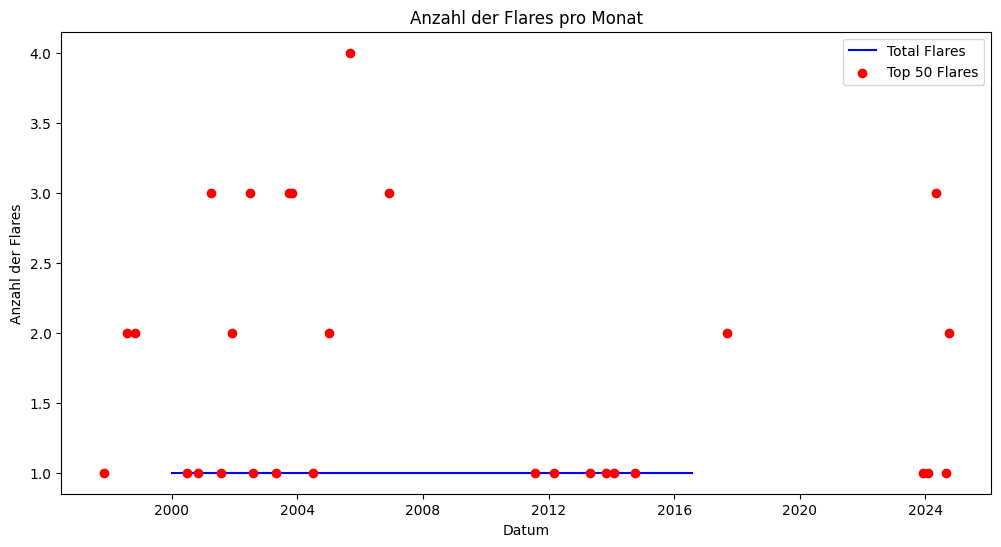

In [8]:
import matplotlib.pyplot as plt




# Aggregieren der Anzahl der Flares pro Monat
flare_counts = df_nasa.groupby('year_month').size()
top_50_counts = df_spaceweather.groupby('year_month').size()

# Erstellen der Grafik
plt.figure(figsize=(12, 6))
plt.plot(flare_counts.index.to_timestamp(), flare_counts, label='Total Flares', color='blue')
plt.scatter(top_50_counts.index.to_timestamp(), top_50_counts, color='red', label='Top 50 Flares', zorder=5)

# Hinzufügen von Titeln und Labels
plt.title('Anzahl der Flares pro Monat')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Flares')
plt.legend()

# Anzeigen der Grafik
plt.show()